In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [17]:
# Import necessary libraries


# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display dataset information
print(f"Training samples: {x_train.shape[0]}, Validation samples: {x_val.shape[0]}, Test samples: {x_test.shape[0]}")

Training samples: 40000, Validation samples: 10000, Test samples: 10000


In [18]:
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt


In [19]:
#import MobilNeTV2 Model
base_model = MobileNetV2(weights='imagenet',include_top=False , input_shape= (32,32,3))
# get summary of the model
base_model.summary()


C:\Users\PC\AppData\Local\Temp\ipykernel_22016\846152143.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet',include_top=False , input_shape= (32,32,3))


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [20]:
# inspect layer and finding first layer
layer_with_weights = None
for layer in base_model.layers:
    if layer.get_weights():
        layer_with_weights = layer
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.47017857..0.6915975].


first layer With weight:Conv1


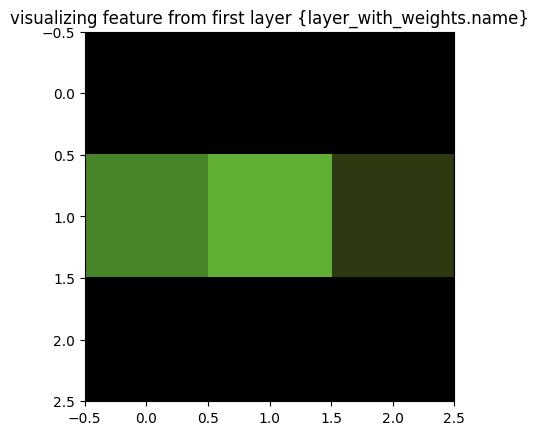

In [21]:
if layer_with_weights:
    print(f"first layer With weight:{layer_with_weights.name}")
    weight = layer_with_weights.get_weights()[0]
    if weight.ndim == 4: #check if the weights are are complatible for visaulization
        plt.imshow(weight[:,:,:,0],cmap='viridis')
        plt.title("visualizing feature from first layer {layer_with_weights.name}")
        plt.show()
    else:
        print(f"Cannot visualize weights from layer {layer_with_weights.name}: incompatible dimensions.")
else:
    print("No layers with weights found in the model.")

In [26]:
from tensorflow.keras.layers import GlobalAveragePooling2D , Dense,Dropout
from tensorflow.keras.models import Model


In [28]:
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Print final validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_accuracy:.2f}")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.2317 - loss: 2.0952 - val_accuracy: 0.3080 - val_loss: 1.9537
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.2518 - loss: 2.0412 - val_accuracy: 0.3138 - val_loss: 1.9220
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.2582 - loss: 2.0214 - val_accuracy: 0.3212 - val_loss: 1.9073
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.2616 - loss: 2.0092 - val_accuracy: 0.3155 - val_loss: 1.9021
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.2682 - loss: 1.9944 - val_accuracy: 0.3264 - val_loss: 1.8817
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.2714 - loss: 1.9840 - val_accuracy: 0.3255 - val_loss: 1.8777
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.2730 - loss: 1.9835 - val_accuracy: 0.3347 - val_loss: 1.8722
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.2741 -

In [ ]:
test_loss,test_accuracy = model.evaluate(x_test,y_test ,verbose=2)
print(f"test accuracy{test_accuracy:.2f}")



313/313 - 4s - 12ms/step - accuracy: 0.3275 - loss: 1.8705
test accuracy0.33


In [39]:
intermediate_layer_model = Model(inputs = model.input , outputs = base_model.get_layer('block_1_expand_relu').output)
intermediate_layer_model = Model(inputs=model.input, outputs=base_model.get_layer('block_1_expand_relu').output)
intermediate_output = intermediate_layer_model.predict(x_test[:5])

#print("Original input shape:", x_test[:5].shape)
print("Intermediate output shape:", intermediate_output.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Intermediate output shape: (5, 16, 16, 96)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


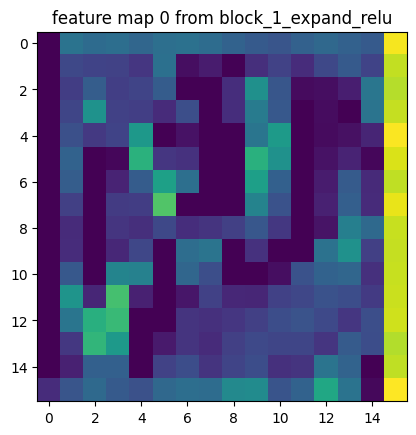

In [38]:
intermediate_output = intermediate_layer_model.predict(x_test[:5])

plt.imshow(intermediate_output[0,:,:,0],cmap = 'viridis')
plt.title("feature map 0 from block_1_expand_relu")
plt.show()


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , MaxPooling2D

baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

baseline_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics=['accuracy'])
baseline_history = baseline_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs= 10,batch_size= 32)




Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4578 - loss: 1.5088 - val_accuracy: 0.5465 - val_loss: 1.2811
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5753 - loss: 1.2085 - val_accuracy: 0.5794 - val_loss: 1.1848
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6224 - loss: 1.0694 - val_accuracy: 0.6246 - val_loss: 1.0859
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6604 - loss: 0.9696 - val_accuracy: 0.6354 - val_loss: 1.0540
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6888 - loss: 0.8825 - val_accuracy: 0.6336 - val_loss: 1.0699
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7171 - loss: 0.8132 - val_accuracy: 0.6322 - val_loss: 1.0785
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7366 - loss: 0.7549 - val_accuracy: 0.6291 - val_loss: 1.1170
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7566 - loss: 0.69

In [46]:
# Evaluate the baseline model
baseline_loss, baseline_accuracy = baseline_model.evaluate(x_test, y_test, verbose=2)
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

# Summarize comparison
print(f"Transfer Learning Test Accuracy: {test_accuracy:.2f}")
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

313/313 - 1s - 2ms/step - accuracy: 0.6348 - loss: 1.1999
Baseline Model Test Accuracy: 0.63
Transfer Learning Test Accuracy: 0.33
Baseline Model Test Accuracy: 0.63


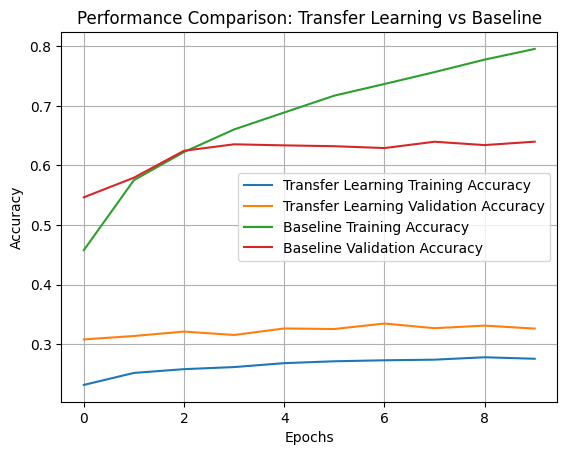

In [47]:
plt.plot(history.history['accuracy'], label='Transfer Learning Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Transfer Learning Validation Accuracy')
plt.plot(baseline_history.history['accuracy'], label='Baseline Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Performance Comparison: Transfer Learning vs Baseline')
plt.grid(True)  # Add grid for clarity
plt.show()